In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from brokenaxes import brokenaxes
import matplotlib.ticker as mticker

In [2]:
def time_select(df, start, end):
    return df[(df['Year'] >= start) & (df['Year'] <= end)]

In [3]:
df = pd.read_csv("trade.csv")

start, end = 1970, 2000 # Advantage for USA
# start, end = 2000, 2014 # Advantage for China
# start, end = 1960, 2018

subset = df.drop(columns=['Country Code'])
# subset['Year'] = pd.to_datetime(subset['Year'])
usa = subset[subset['Country Name'] == 'United States'].sort_values('Year')
china = subset[subset['Country Name'] == 'China'].sort_values('Year')
usa, china = time_select(usa, start, end), time_select(china, start, end)

In [4]:
# Select export-related columns + Year
export_cols = ['Year'] + [col for col in usa.columns if 'export' in col.lower()]

# Create filtered dataframe
usa_exports = usa[export_cols]
china_exports = china[export_cols]


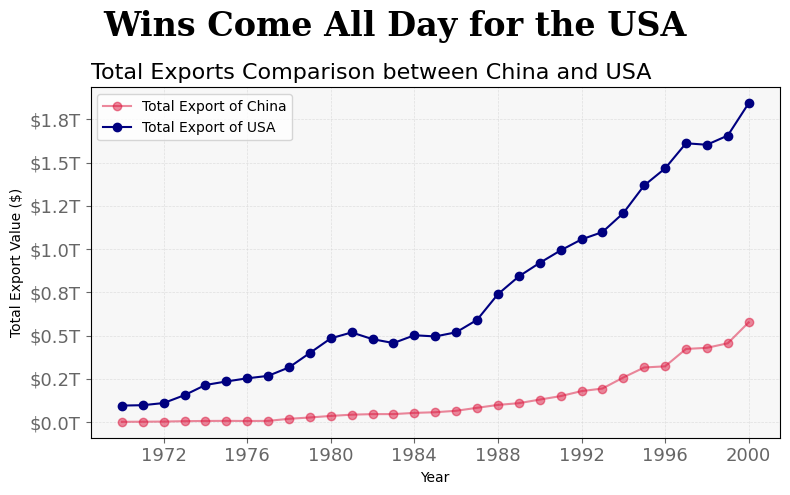

In [5]:
# Assistant
china_exports_total = china_exports.groupby('Year').sum().sum(axis=1)
usa_exports_total = usa_exports.groupby('Year').sum().sum(axis=1)

# Use object-oriented plotting (correct approach)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(china_exports_total.index, china_exports_total.to_numpy(), marker='o', label="Total Export of China",color='crimson', alpha=0.5)
ax.plot(usa_exports_total.index, usa_exports_total.to_numpy(), marker='o', label="Total Export of USA", color='navy')

ax.set_title("Total Exports Comparison between China and USA", fontsize=16, loc='left')
ax.set_xlabel("Year")
ax.set_ylabel("Total Export Value ($)")  # Adjusted label to match actual meaning

# Fix: Use tick_params instead of set_xticks/set_yticks for styling
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)

# Format the axes
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
formatter = mticker.FuncFormatter(lambda x, _: f"${x/1e12:.1f}T")
ax.yaxis.set_major_formatter(formatter)

# Optional: Add footnote text
# fig.text(0.1, -0.05, "¹ Total exports calculated as the sum of all export-related categories for each year.", fontsize=8)

ax.legend()
plt.gca().set_facecolor('#f7f7f7')
plt.grid(True, linestyle='--', linewidth=0.5, color='#d0d0d0', alpha=0.6)
fig.suptitle("Wins Come All Day for the USA", fontsize=24, weight='bold', family='serif')
fig.tight_layout()
plt.show()

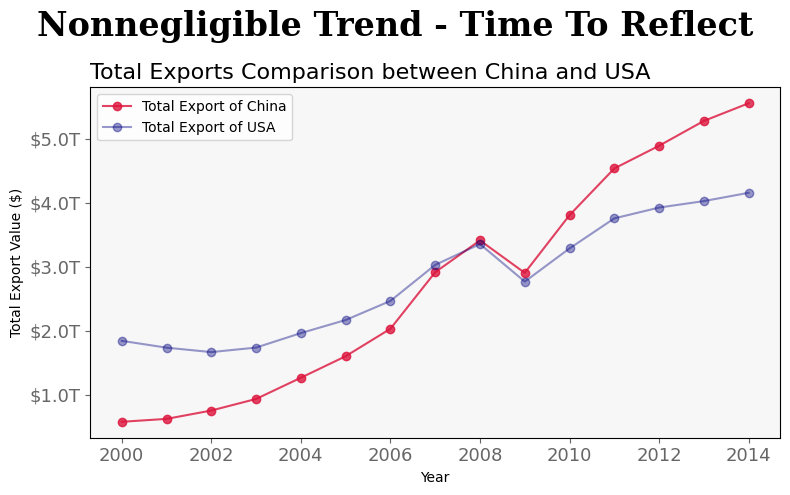

In [6]:
start, end = 2000, 2014 # Advantage for China
usa = subset[subset['Country Name'] == 'United States'].sort_values('Year')
china = subset[subset['Country Name'] == 'China'].sort_values('Year')
usa, china = time_select(usa, start, end), time_select(china, start, end)

usa_exports = usa[export_cols]
china_exports = china[export_cols]

# Assistant
china_exports_total = china_exports.groupby('Year').sum().sum(axis=1)
usa_exports_total = usa_exports.groupby('Year').sum().sum(axis=1)

# Use object-oriented plotting (correct approach)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(china_exports_total.index, china_exports_total.to_numpy(), marker='o', label="Total Export of China",color='crimson', alpha=0.8)
ax.plot(usa_exports_total.index, usa_exports_total.to_numpy(), marker='o', label="Total Export of USA", alpha = 0.4, color='navy')

ax.set_title("Total Exports Comparison between China and USA", fontsize=16, loc='left')
ax.set_xlabel("Year")
ax.set_ylabel("Total Export Value ($)")  # Adjusted label to match actual meaning

# Fix: Use tick_params instead of set_xticks/set_yticks for styling
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)

# Format the axes
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
formatter = mticker.FuncFormatter(lambda x, _: f"${x/1e12:.1f}T")
ax.yaxis.set_major_formatter(formatter)

# Optional: Add footnote text
# fig.text(0.1, -0.05, "¹ Total exports calculated as the sum of all export-related categories for each year.", fontsize=8)

ax.legend()
fig.gca().set_facecolor('#f7f7f7')
fig.suptitle("Nonnegligible Trend - Time To Reflect", fontsize=24, weight='bold', family='serif')
fig.tight_layout()
plt.show()

Created visualization at vis_pro_true.png


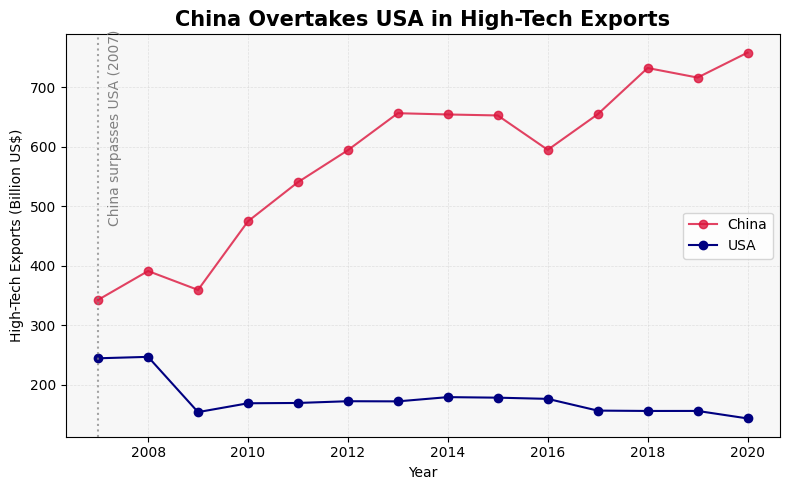

In [129]:
# Filter dataset for China and USA
china = df[df['Country Name'] == 'China']
usa = df[df['Country Name'] == 'United States']

# High-tech exports current US$
col_ht_usd = 'average_value_High-technology exports (current US$)'
# Sometimes columns might have extra spaces; ensure correct
assert col_ht_usd in df.columns, "Column not found!"

china_ht = china[['Year', col_ht_usd]].dropna()
usa_ht = usa[['Year', col_ht_usd]].dropna()

# Align years common to both for fairness
common_years = sorted(set(china_ht['Year']).intersection(set(usa_ht['Year'])))
china_ht_common = china_ht[china_ht['Year'].isin(common_years)].set_index('Year').sort_index()
usa_ht_common = usa_ht[usa_ht['Year'].isin(common_years)].set_index('Year').sort_index()

# ========= Visualization 1: Persuade proposition TRUE =========
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(china_ht_common.index, china_ht_common[col_ht_usd]/1e9, label='China', marker='o', color='crimson', alpha=0.8)
ax1.plot(usa_ht_common.index, usa_ht_common[col_ht_usd]/1e9, label='USA', marker='o', color='navy')
ax1.set_title("China Overtakes USA in High-Tech Exports", fontsize=15, weight='bold')
ax1.set_ylabel("High-Tech Exports (Billion US$)")
ax1.set_xlabel("Year")
ax.tick_params(axis='x', colors='#666666', labelsize=13)
ax.tick_params(axis='y', colors='#666666', labelsize=13)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6, linewidth=0.5, color='#d0d0d0')
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
# annotate crossing year
diff = china_ht_common[col_ht_usd] - usa_ht_common[col_ht_usd]
cross_years = diff[diff>0]
if not cross_years.empty:
    first_cross = cross_years.index[0]
    ax1.axvline(first_cross, color='gray', linestyle=':', alpha=0.7)
    ax1.text(first_cross+0.2, ax1.get_ylim()[1]*0.8, f"China surpasses USA ({first_cross})", rotation=90, va='center', color='gray')

fig1.gca().set_facecolor('#f7f7f7')
fig1.tight_layout()
fig1.savefig('vis_pro_true.png', dpi=300)

print("Created visualization at vis_pro_true.png")


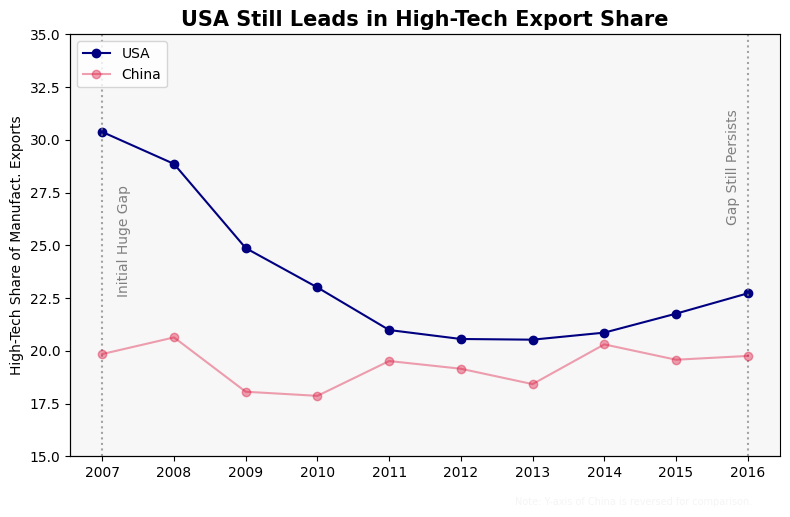

In [134]:
# --- DATA -------------------------------------------------
col_pct = 'average_value_High-technology exports (% of manufactured exports)'

usa_pct   = usa[['Year', col_pct]].dropna().set_index('Year').sort_index()
china_pct = china[['Year', col_pct]].dropna().set_index('Year').sort_index()

years = usa_pct.index.intersection(china_pct.index).drop([2017, 2018, 2019])  # keep common years
usa_y   = usa_pct.loc[years,  col_pct]
china_y = china_pct.loc[years, col_pct]

# --- PLOT -------------------------------------------------
fig, ax_us = plt.subplots(figsize=(8, 5))

# 1) USA on the primary (left) y-axis
ax_us.plot(years, usa_y, color='navy', marker='o', label='USA')
ax_us.set_ylabel("High-Tech Share of Manufact. Exports")
ax_us.set_ylim(15, 35)               # tight range → gap looks big

# 2) China on a secondary, *inverted* axis
ax_cn = ax_us.twinx()
ax_cn.plot(years, china_y, color='crimson', marker='o', label='China', alpha=0.4)
ax_cn.set_ylim(35, 15)               # ← invert the axis

# Hide the y-axis of ax_cn completely
ax_cn.yaxis.set_visible(False)  # This hides the entire y-axis including ticks and labels
# Alternative: ax_cn.tick_params(axis='y', which='both', right=False, labelright=False)

# 3) Cosmetic tweaks that hide the trick
ax_cn.spines['right'].set_visible(False)  # hide the right spine
ax_us.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Title & footnote
ax_us.set_title("USA Still Leads in High-Tech Export Share", fontsize=15, weight='bold')
fig.text(0.65, -0.02,
         "Note: Y-axis of China is reversed for comparison.",
         fontsize=7, color='#edebeb', alpha=0.5)


# Unified legend
lines = ax_us.get_lines() + ax_cn.get_lines()
labels = [l.get_label() for l in lines]
ax_us.legend(lines, labels, loc='upper left')

# Emphasize difference
ax_us.axvline(2007, color='gray', linestyle=':', alpha=0.7)
ax_us.text(2007+0.2, ax_us.get_ylim()[1]*0.72, f"Initial Huge Gap", rotation=90, va='center', color='gray')

ax_us.axvline(2016, color='gray', linestyle=':', alpha=0.7)
ax_us.text(2016-0.3, ax_us.get_ylim()[1]*0.82, f"Gap Still Persists", rotation=90, va='center', color='gray')

ax_us.set_facecolor('#f7f7f7') 
fig.tight_layout()
fig.savefig('vis_pro_false.png', dpi=300)